In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('../Data/dual_loggers1.csv')
df1

,start,end
0,1368754417640371,1368762376901649
1,1368762378476741,1368762379492665
2,1368762381233665,1368762382253686
3,1368762383520519,1368762384541564
4,1368762384759700,1368762387834101
5,1368762388053262,1368762389078403
6,1368762389305757,1368762390324754
7,1368762390553132,1368762391569056
8,1368762391787193,1368762392809262
9,1368762393027399,1368762394048444


In [5]:
df1['difference'] = df1['end'] - df1['start']
df1

,start,end,difference
0,1368754417640371,1368762376901649,7959261278
1,1368762378476741,1368762379492665,1015924
2,1368762381233665,1368762382253686,1020021
3,1368762383520519,1368762384541564,1021045
4,1368762384759700,1368762387834101,3074401
5,1368762388053262,1368762389078403,1025141
6,1368762389305757,1368762390324754,1018997
7,1368762390553132,1368762391569056,1015924
8,1368762391787193,1368762392809262,1022069
9,1368762393027399,1368762394048444,1021045


In [37]:
sixty_2 = 62 * 1*10**9 + 1.3687*10**15

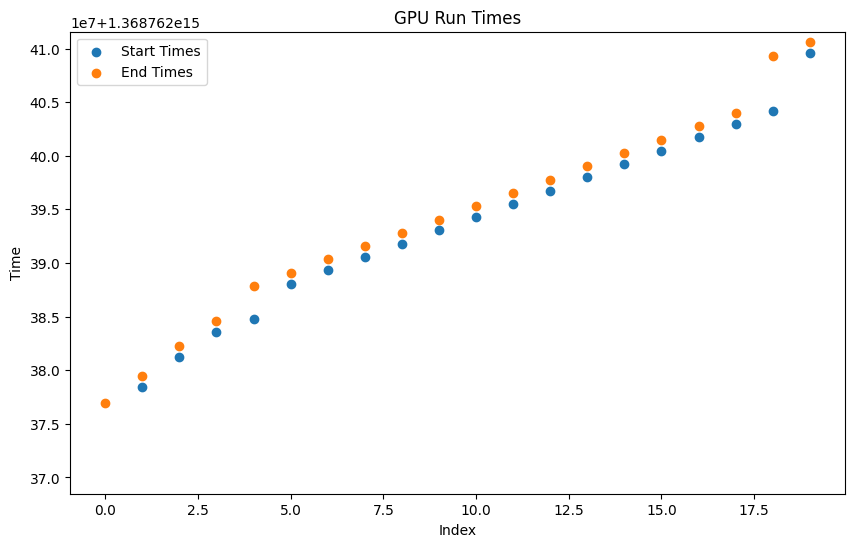

In [55]:
# Extract the start and end times from the DataFrame
start_times = df1['start']
end_times = df1['end']

# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(start_times)), start_times, label='Start Times')
plt.scatter(range(len(end_times)), end_times, label='End Times')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Time')
plt.title('GPU Run Times')
plt.legend()

# Set the y-axis limits
plt.ylim(1368762378476741-1e7, end_times.max()+1e6)

# Show the plot
plt.show()

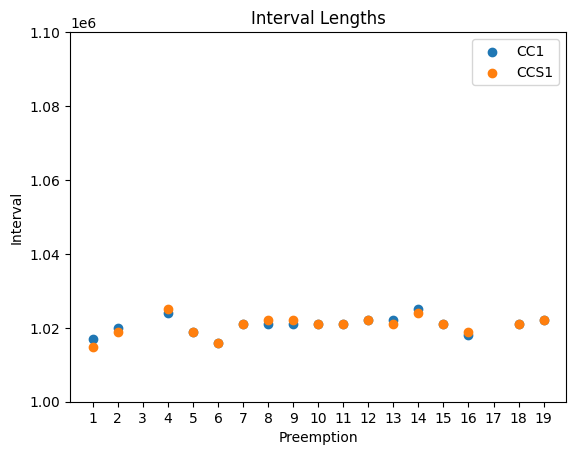

In [47]:
# Load the data
cc1 = pd.read_csv('../Data/constCyclesData/constCycles1.csv')
ccs1 = pd.read_csv('../Data/constCyclesData/constCyclesShared1.csv')

cc1.columns = ['start', 'end']
ccs1.columns = ['start', 'end']

cc1['interval'] = cc1['end'] - cc1['start']
ccs1['interval'] = ccs1['end'] - ccs1['start']

cc2 = pd.read_csv('../Data/constCyclesData/constCycles2.csv')
ccs2 = pd.read_csv('../Data/constCyclesData/constCyclesShared2.csv')

cc2.columns = ['start', 'end']
ccs2.columns = ['start', 'end']

cc2['interval'] = cc2['end'] - cc2['start']
ccs2['interval'] = ccs2['end'] - ccs2['start']

cc3 = pd.read_csv('../Data/constCyclesData/constCycles3.csv')
ccs3 = pd.read_csv('../Data/constCyclesData/constCyclesShared3.csv')

cc3.columns = ['start', 'end']
ccs3.columns = ['start', 'end']

cc3['interval'] = cc3['end'] - cc3['start']
ccs3['interval'] = ccs3['end'] - ccs3['start']

# ------------

# Create a scatter plot
plt.scatter(range(1, 20), cc1['interval'], label='CC1')
plt.scatter(range(1, 20), ccs1['interval'], label='CCS1')
#plt.scatter(df3['X3'], df3['Y3'], label='DataFrame 3')

# Add labels and title
plt.xlabel('Preemption')
plt.ylabel('Interval')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(1e6, 1e6 + 1e5)

# Set x-axis ticks
plt.xticks(range(1, 20))

# Show the plot
plt.show()


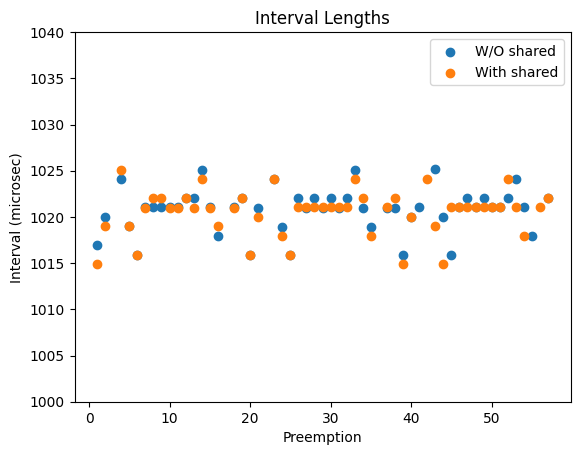

In [59]:
# Rescale to microseconds
all_ivls = (cc1['interval']/1000).to_list() + (cc2['interval']/1000).to_list() + (cc3['interval']/1000).to_list()
all_ivls_shared = (ccs1['interval']/1000).to_list() + (ccs2['interval']/1000).to_list() + (ccs3['interval']/1000).to_list()

plt.scatter(range(1, 58), all_ivls, label='W/O shared')
plt.scatter(range(1, 58), all_ivls_shared, label='With shared')

# Add labels and title
plt.xlabel('Preemption')
plt.ylabel('Interval (microsec)')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(1e3, 1.04*1e3)

# Show the plot
plt.show()

# Note: this graph is inaccurate bc the preemptions are concatenated

In [54]:
!./plot_ivls2.py ../Data/constCyclesData/constCycles1.csv

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Figure(1600x200)


In [61]:
import numpy as np

np.mean(all_ivls), np.mean(all_ivls_shared)

(1362.7318070175438, 1344.4419649122806)

In [64]:
sum_no_shared =  np.percentile(all_ivls, [0, 25, 50, 75, 100], method='midpoint')
# Print the five-number summary
print("Minimum:", sum_no_shared[0])
print("Q1:", sum_no_shared[1])
print("Median:", sum_no_shared[2])
print("Q3:", sum_no_shared[3])
print("Maximum:", sum_no_shared[4])

Minimum: 1015.89
Q1: 1021.009
Median: 1021.036
Q3: 1022.06
Maximum: 5122.551


In [65]:
sum_shared = np.percentile(all_ivls_shared, [0, 25, 50, 75, 100], method='midpoint')
# Print the five-number summary
print("Minimum:", sum_shared[0])
print("Q1:", sum_shared[1])
print("Median:", sum_shared[2])
print("Q3:", sum_shared[3])
print("Maximum:", sum_shared[4])


Minimum: 1014.868
Q1: 1020.01
Median: 1021.028
Q3: 1022.052
Maximum: 5121.557
